	Theta 0 : 0.00021	 Theta 1: 0.00095
	Theta 0 : 0.01903	 Theta 1: 0.08730


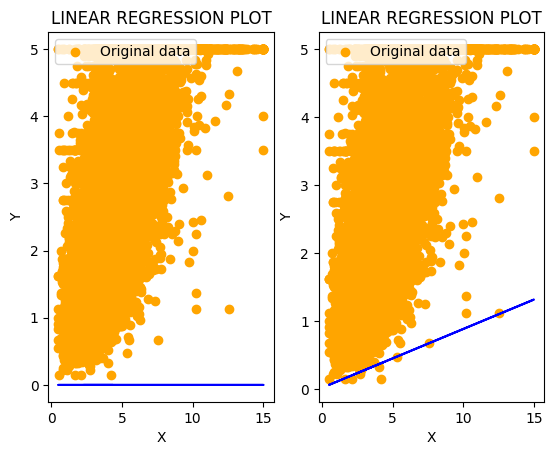

	Theta 0 : 0.03464	 Theta 1: 0.15836
	Theta 0 : 0.04761	 Theta 1: 0.21684


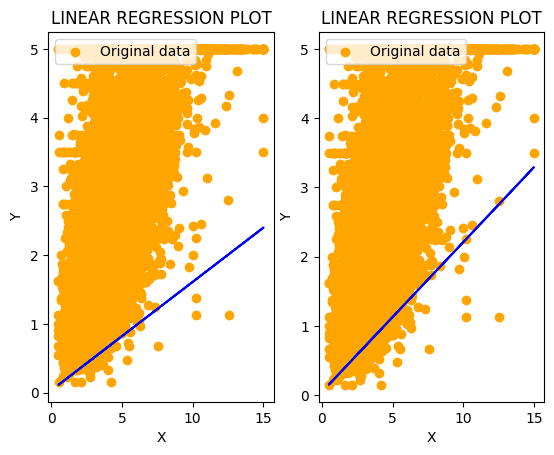

	Theta 0 : 0.05840	 Theta 1: 0.26495
	Theta 0 : 0.06740	 Theta 1: 0.30454


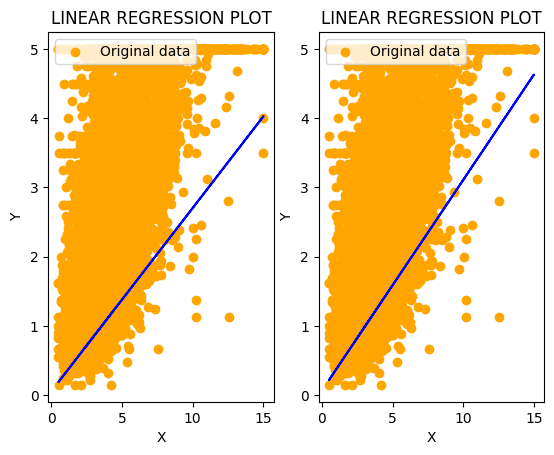

	Theta 0 : 0.07492	 Theta 1: 0.33710
	Theta 0 : 0.08123	 Theta 1: 0.36389


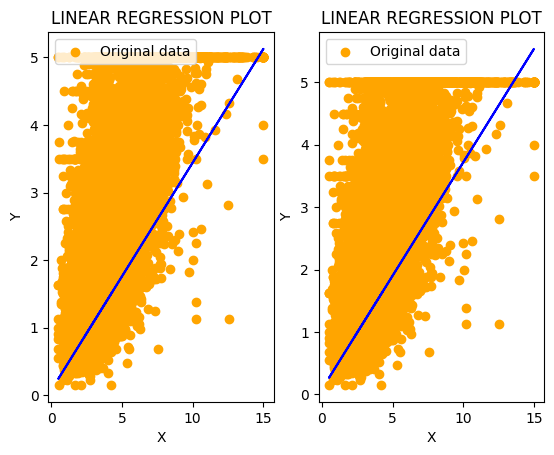

	Theta 0 : 0.08654	 Theta 1: 0.38591
	Theta 0 : 0.09102	 Theta 1: 0.40402


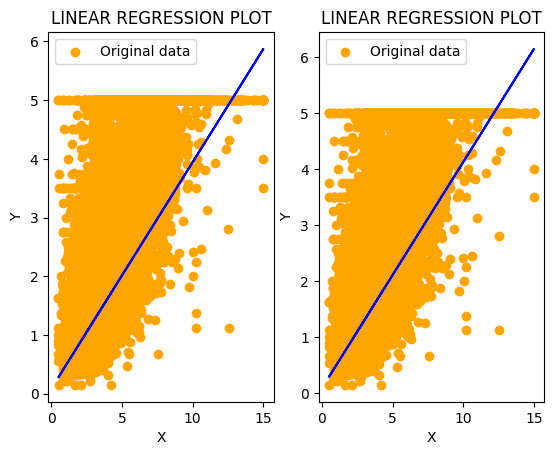

MAE = 0.6308985196676693
MSE = 0.8318052636749427


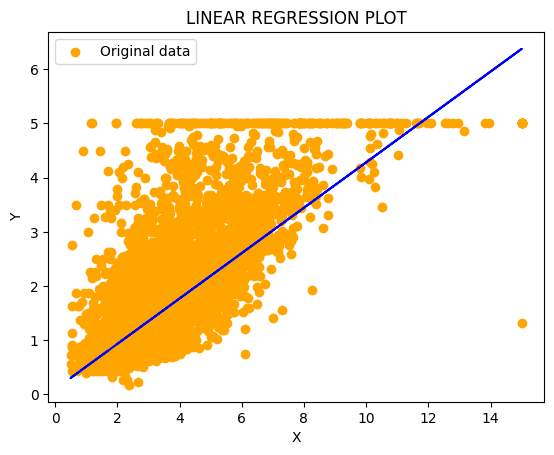

	Theta 0 : 0.09479	 Theta 1: 0.41877


In [5]:
#Linear Regression with Regularization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
x,y=fetch_california_housing(return_X_y=True)
x = x[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
alpha=0.0001
lambda_reg = 0.1
theta_0=0
theta_1=0
prev_prediction_sum = 0
sb=1
for i in range(1000):
  y_predicted=theta_0+theta_1*x_train
  if i > 0 and np.abs(np.sum(y_predicted) - prev_prediction_sum) < 1e-3:
    print(f"Stopping early at iteration {i}")
    break
  prev_prediction_sum = np.sum(y_predicted)
  theta_0=theta_0-(alpha*(np.sum(y_predicted-y_train)))/len(x_train)
  theta_1=theta_1-(alpha*(np.sum((y_predicted-y_train)*x_train) + lambda_reg * theta_1))/len(x_train)
  if(i%100==0):
    print("\tTheta 0 : {:0.5f}\t Theta 1: {:0.5f}".format(theta_0,theta_1))
    plt.subplot(1,2,sb)
    plt.scatter(x_train,y_train,color='orange',marker='o',label='Original data')
    plt.plot(x_train,y_predicted,color='blue')
    plt.title('LINEAR REGRESSION PLOT')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper left')
    sb+=1
    if(sb==3):
      plt.show()
      sb=1
y_predicted=theta_0+theta_1*x_test
print("MAE = {0}".format(metrics.mean_absolute_error(y_test,y_predicted)))
print("MSE = {0}".format(metrics.mean_squared_error(y_test,y_predicted)))
plt.scatter(x_test,y_test,color='orange',marker='o',label='Original data')
plt.plot(x_test,y_predicted,color='blue')
plt.title('LINEAR REGRESSION PLOT')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()
print("\tTheta 0 : {:0.5f}\t Theta 1: {:0.5f}".format(theta_0,theta_1))

In [7]:
#Multiple Linear Regression with Regularization

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
df = pd.read_csv('/content/Multivariate dataset.csv')
X = df[['x3', 'x5', 'x6', 'x7', 'x8']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
learning_rate = 0.000000001
n_iterations = 10000
lambda_reg = 0.1
theta_0 = 0
theta_1 = 0
theta_2 = 0
theta_3 = 0
theta_4 = 0
theta_5 = 0
for i in range(n_iterations):
    predictions = (theta_0 +
                   theta_1 * X_train['x3'] +
                   theta_2 * X_train['x5'] +
                   theta_3 * X_train['x6'] +
                   theta_4 * X_train['x7'] +
                   theta_5 * X_train['x8'])
    errors = predictions - y_train
    theta_0 = theta_0 - learning_rate * errors.mean()
    theta_1 = theta_1 - learning_rate * ((X_train['x3'] * errors).mean() + (lambda_reg / len(X_train)) * theta_1)
    theta_2 = theta_2 - learning_rate * ((X_train['x5'] * errors).mean() + (lambda_reg / len(X_train)) * theta_2)
    theta_3 = theta_3 - learning_rate * ((X_train['x6'] * errors).mean() + (lambda_reg / len(X_train)) * theta_3)
    theta_4 = theta_4 - learning_rate * ((X_train['x7'] * errors).mean() + (lambda_reg / len(X_train)) * theta_4)
    theta_5 = theta_5 - learning_rate * ((X_train['x8'] * errors).mean() + (lambda_reg / len(X_train)) * theta_5)
    if i % 1000 == 0:
        print(f"Iteration {i}: Theta 0: {theta_0:.5f}, Theta 1: {theta_1:.5f}, Theta 2: {theta_2:.5f}, Theta 3: {theta_3:.5f}, Theta 4: {theta_4:.5f}, Theta 5: {theta_5:.5f}")
y_pred = (theta_0 +
          theta_1 * X_test['x3'] +
          theta_2 * X_test['x5'] +
          theta_3 * X_test['x6'] +
          theta_4 * X_test['x7'] +
          theta_5 * X_test['x8'])
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Iteration 0: Theta 0: 0.00002, Theta 1: 0.03633, Theta 2: 0.00072, Theta 3: 0.00029, Theta 4: 0.07054, Theta 5: 0.10147
Iteration 1000: Theta 0: 0.00108, Theta 1: 2.67923, Theta 2: 0.03928, Theta 3: 0.00048, Theta 4: 7.00436, Theta 5: 11.77268
Iteration 2000: Theta 0: -0.00049, Theta 1: 2.57417, Theta 2: 0.00188, Theta 3: -0.03282, Theta 4: 6.27899, Theta 5: 12.33330
Iteration 3000: Theta 0: -0.00208, Theta 1: 2.55829, Theta 2: -0.03570, Theta 3: -0.06654, Theta 4: 5.67162, Theta 5: 12.77103
Iteration 4000: Theta 0: -0.00368, Theta 1: 2.54897, Theta 2: -0.07368, Theta 3: -0.10071, Theta 4: 5.17526, Theta 5: 13.12729
Iteration 5000: Theta 0: -0.00530, Theta 1: 2.54160, Theta 2: -0.11199, Theta 3: -0.13525, Theta 4: 4.77021, Theta 5: 13.41799
Iteration 6000: Theta 0: -0.00694, Theta 1: 2.53566, Theta 2: -0.15058, Theta 3: -0.17009, Theta 4: 4.43969, Theta 5: 13.65525
Iteration 7000: Theta 0: -0.00859, Theta 1: 2.53086, Theta 2: -0.18939, Theta 3: -0.20518, Theta 4: 4.16999, Theta 5: 13.8

In [10]:
#Normal Equation using Regularization

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn import metrics
from numpy.linalg import inv
import numpy.linalg as linalg

X, y = fetch_california_housing(return_X_y=True)

X_train_temp = X[0:15000, :]
y_train = y[0:15000]
X_test_temp = X[15000:, :]
y_test = y[15000:]

X_train = np.zeros((X_train_temp.shape[0], X_train_temp.shape[1] + 1))
X_train[:, 0] = 1
X_train[:, 1:] = X_train_temp

X_test = np.zeros((X_test_temp.shape[0], X_test_temp.shape[1] + 1))
X_test[:, 0] = 1
X_test[:, 1:] = X_test_temp

lambda_reg = 0.1
I = np.identity(X_train.shape[1])
I[0, 0] = 0

XTX = X_train.T @ X_train
XTX_reg = XTX + lambda_reg * I

try:
    XTX_reg_inv = inv(XTX_reg)
except linalg.LinAlgError as e:
    print(f"[Matrix Inversion Error] → {e}")
    print("Detected singular matrix in (XᵀX + λI). Switching to pseudo-inverse (pinv) for stability.")
    XTX_reg_inv = linalg.pinv(XTX_reg)

XTY = X_train.T @ y_train
theta = XTX_reg_inv @ XTY

y_pred_train = X_train @ theta
y_pred_test = X_test @ theta

print("\n Training Set Evaluation (with Regularization)")
print(f"-> Mean Squared Error (Train): {metrics.mean_squared_error(y_train, y_pred_train):.5f}")

print("\n Testing Set Evaluation (with Regularization)")
print(f"-> Mean Squared Error (Test): {metrics.mean_squared_error(y_test, y_pred_test):.5f}")



 Training Set Evaluation (with Regularization)
-> Mean Squared Error (Train): 0.50842

 Testing Set Evaluation (with Regularization)
-> Mean Squared Error (Test): 0.60175
